**Load Dataset**

In [ ]:
import pandas as pd

# Specify the path to your dataset file on Google Drive
dataset_path = '/content/drive/MyDrive/new folder/spam sms/extracted/spam.csv'

# Load the dataset with explicit encoding
data = pd.read_csv(dataset_path, encoding='ISO-8859-1')

**Explore the Dataset**

In [ ]:
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
data.shape

(5572, 5)

**Data Preprocessing**

In [ ]:
# Check the number of missing values in each column
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print(missing_values)


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [ ]:
# Drop columns with missing values
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Display the size of the DataFrame after dropping columns
size_after_dropping = data.shape
print("Size of DataFrame after dropping columns:", size_after_dropping)

Size of DataFrame after dropping columns: (5572, 2)


In [ ]:
# Display the first 5 rows of the cleaned DataFrame
print(data.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# Check the class balance in the 'v1' column
class_balance = data['v1'].value_counts()

# Display the class balance
print("Class Balance:")
print(class_balance)

Class Balance:
ham     4825
spam     747
Name: v1, dtype: int64


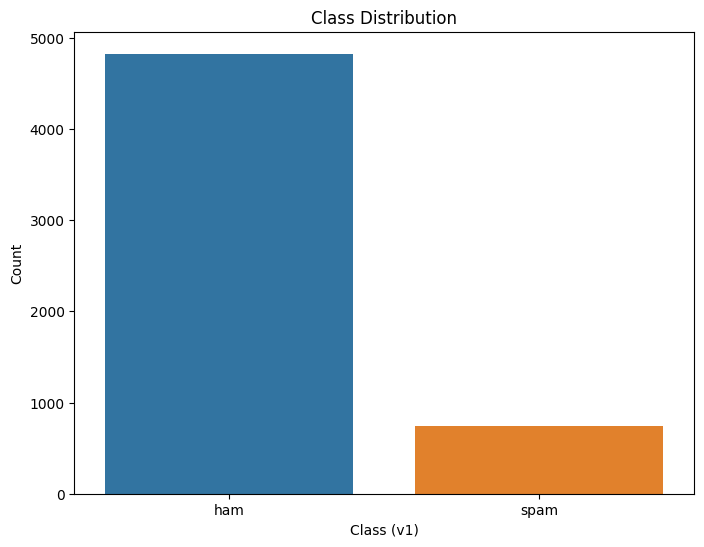

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=data)
plt.title('Class Distribution')
plt.xlabel('Class (v1)')
plt.ylabel('Count')
plt.show()

In [ ]:
# Here 'v1' is the label column and 'v2' is the text column
X = data['v2']
y = data['v1']

In [ ]:
# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Model Training and Evaluation**

In [ ]:
# Train and evaluate Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)

print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))

Naive Bayes Classifier:
Accuracy: 0.9704035874439462
Confusion Matrix:
 [[965   1]
 [ 32 117]]
Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



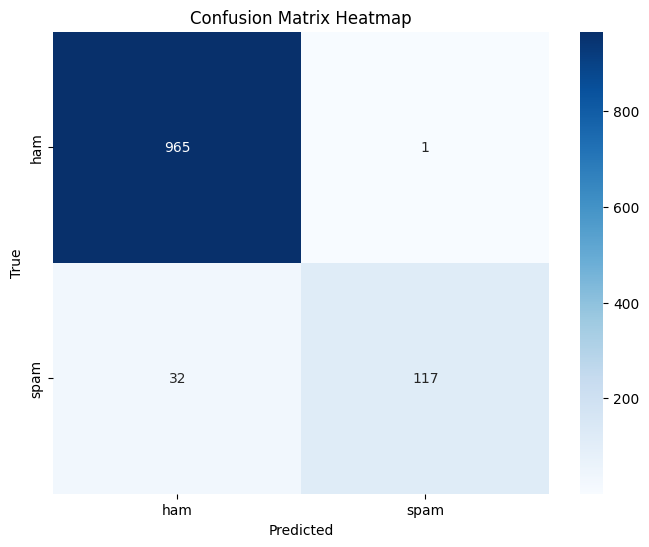

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to plot confusion matrix heatmap
def plot_confusion_matrix_heatmap(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Assuming 'y_test' and 'nb_predictions' are the true labels and predicted labels
plot_confusion_matrix_heatmap(y_test, nb_predictions, labels=['ham', 'spam'])